!conda install scikit-image
!conda install opencv
!pip install imutils

In [1]:
import os

from skimage.metrics import structural_similarity

import cv2

import argparse
import imutils

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
# load the two input images
imageA = cv2.imread("beyond_card.jpeg")
imageB = cv2.imread("beyond_master_card.jpeg")
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

In [7]:
print(imageA)
print(imageB)

[[[236 255 255]
  [230 250 251]
  [244 255 255]
  ...
  [255 255 252]
  [245 246 244]
  [251 255 255]]

 [[235 253 254]
  [243 255 255]
  [250 255 254]
  ...
  [248 243 240]
  [255 255 254]
  [241 246 245]]

 [[250 255 255]
  [253 255 254]
  [240 237 233]
  ...
  [255 255 252]
  [255 254 253]
  [246 248 248]]

 ...

 [[236 235 237]
  [255 255 254]
  [255 254 251]
  ...
  [255 255 252]
  [253 254 252]
  [247 252 251]]

 [[246 255 255]
  [251 255 255]
  [255 254 254]
  ...
  [244 241 237]
  [253 255 254]
  [238 244 243]]

 [[240 254 255]
  [246 255 255]
  [248 246 246]
  ...
  [255 255 252]
  [242 247 245]
  [248 255 255]]]
[[[232 255 255]
  [227 249 247]
  [243 255 254]
  ...
  [255 255 252]
  [242 247 245]
  [248 255 255]]

 [[230 251 249]
  [241 255 255]
  [248 255 252]
  ...
  [249 246 242]
  [253 255 254]
  [241 247 246]]

 [[248 255 254]
  [251 255 252]
  [243 240 235]
  ...
  [255 255 252]
  [255 255 254]
  [245 250 249]]

 ...

 [[251 254 255]
  [255 254 255]
  [255 255 251]
  ..

# view the array as an image

plt.imshow(imageB)

Text(0.5, 1.0, 'image B')

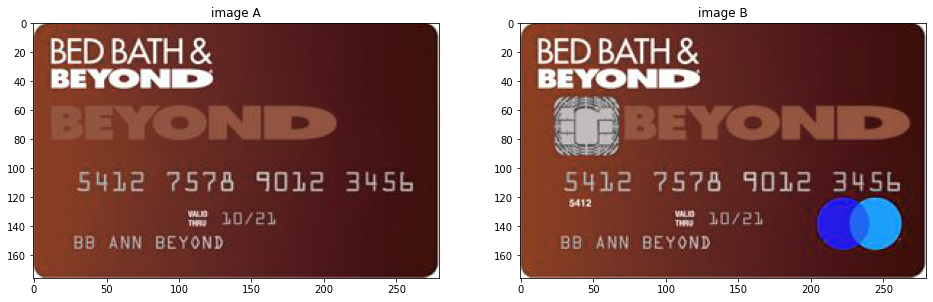

In [8]:
NUM_ROWS = 1
IMGs_IN_ROW = 2
f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,6))

ax[0].imshow(imageA)
ax[1].imshow(imageB)

ax[0].set_title('image A')
ax[1].set_title('image B')


Text(0.5, 1.0, 'image B')

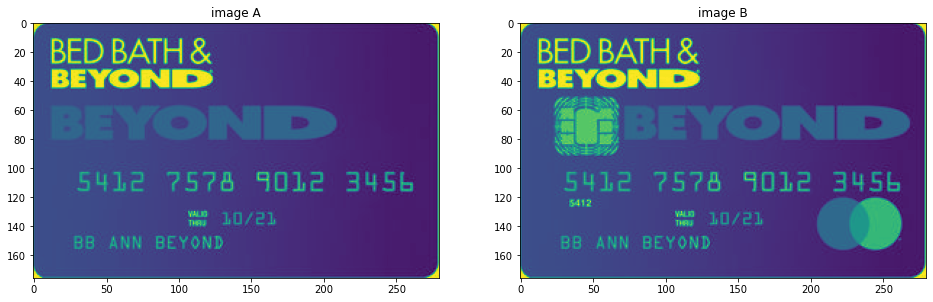

In [9]:
f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,6))

ax[0].imshow(grayA)
ax[1].imshow(grayB)

ax[0].set_title('image A')
ax[1].set_title('image B')

# Similarity score & Spot difference

In [10]:
(score, diff) = structural_similarity(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.8097040366284152


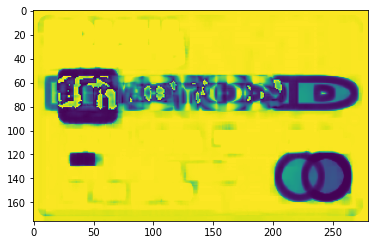

In [11]:
plt.imshow(diff)

In [13]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

In [14]:
thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

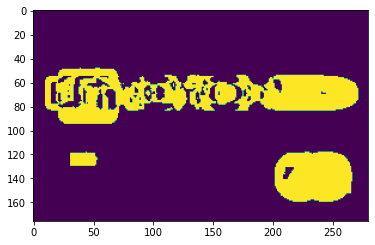

In [15]:
plt.imshow(thresh)

## find contours to spot regions that are different

In [16]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [17]:
cnts = imutils.grab_contours(cnts)

In [18]:
# loop over the contours
for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)

Text(0.5, 1.0, 'image B')

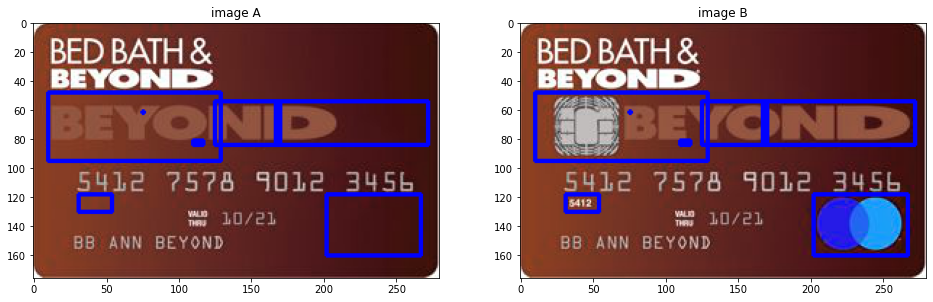

In [19]:
f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,6))

ax[0].imshow(imageA)
ax[1].imshow(imageB)

ax[0].set_title('image A')
ax[1].set_title('image B')

#show the output images as popup
cv2.imshow("Original", imageA)
cv2.imshow("Modified", imageB)
cv2.imshow("Diff", diff)
cv2.imshow("Thresh", thresh)
cv2.waitKey(0)

# Summary

In [4]:
def SpotDifference(file_path_A, file_path_B):
    # load the two input images
    imageA = cv2.imread(file_path_A)
    imageB = cv2.imread(file_path_B)
    # convert the images to grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
    
    #get difference
    (score, diff) = structural_similarity(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")
    
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    
    # loop over the contours
    for c in cnts:
        # compute the bounding box of the contour and then draw the
        # bounding box on both input images to represent where the two
        # images differ
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
        
    # return difference
    f, ax = plt.subplots(1, 3, figsize=(16,6))

    ax[0].imshow(imageA)
    ax[1].imshow(imageB)
    ax[2].imshow(diff)
    
    ax[0].set_title('image A')
    ax[1].set_title('image B')
    

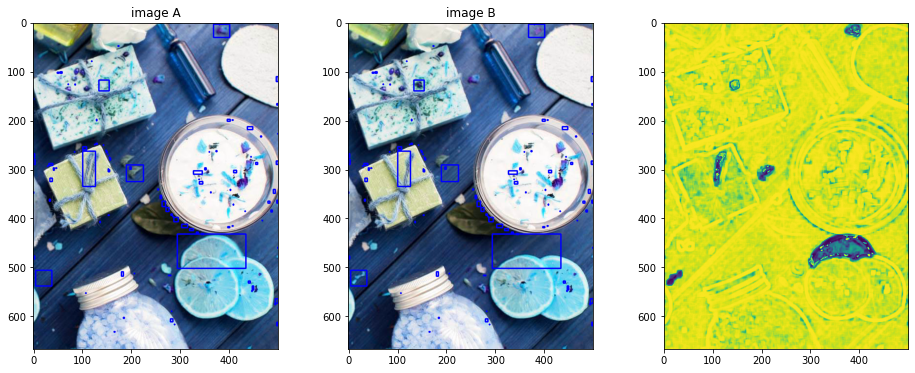

In [5]:
A = "/Users/reejungkim/Documents/Git/Image classification/imageA.jpg"
B = "/Users/reejungkim/Documents/Git/Image classification/imageB.jpg"
SpotDifference(A, B)